# Link Prediction Lab

In [65]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import random as rnd

rnd.seed()

## Graph Input

In [66]:
G = nx.read_edgelist("Link_Prediction/karate")

Number of nodes: 34
Number of edges: 78


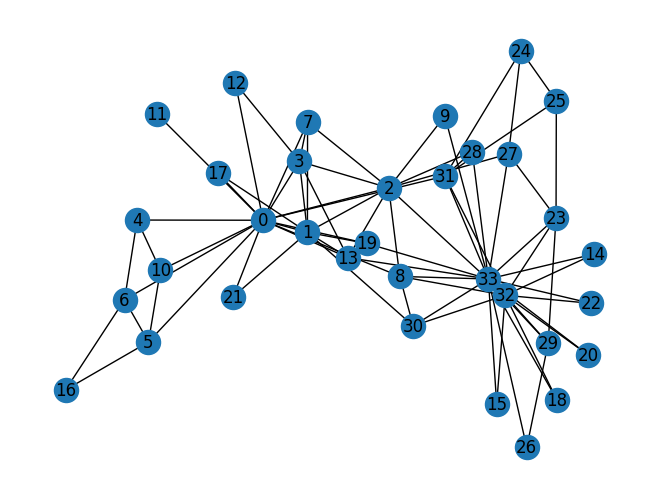

In [67]:

# Check basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")



nx.draw(G, with_labels=True)
plt.show()


## Computing Common Neighbors Score

We define the "common neighbours" link score:

In [68]:
def common_neighbors(G,i,j):
    # G - the graph
    # i,j - the link
    return len(set(G.neighbors(i)) and set(G.neighbors(j)))

In [69]:
common_neighbors(G,'31','17')

2

## Link Prediction

We define a function which returns a sorted list of of scores from a node to other possible nodes in the graph:

In [70]:
def link_list(G, i, score_func):
    # G - the graph
    # i - the node
    # score_func - the link scoring function, having the signature score_func(G,i,j)

    links = []

    for j in G.nodes():
        if i != j and not G.has_edge(i, j):  # Check to avoid self-loops and existing edges
            sc = score_func(G, i, j)
            links.append(((i, j), sc))

    # Sort the links based on the score in descending order
    links.sort(key=lambda x: x[1], reverse=True)

    return links


In [71]:
link_list(G,'31',common_neighbors)

[(('31', '2'), 10),
 (('31', '1'), 9),
 (('31', '3'), 6),
 (('31', '13'), 5),
 (('31', '8'), 5),
 (('31', '23'), 5),
 (('31', '7'), 4),
 (('31', '6'), 4),
 (('31', '5'), 4),
 (('31', '30'), 4),
 (('31', '27'), 4),
 (('31', '29'), 4),
 (('31', '19'), 3),
 (('31', '10'), 3),
 (('31', '4'), 3),
 (('31', '21'), 2),
 (('31', '17'), 2),
 (('31', '12'), 2),
 (('31', '9'), 2),
 (('31', '16'), 2),
 (('31', '14'), 2),
 (('31', '15'), 2),
 (('31', '18'), 2),
 (('31', '20'), 2),
 (('31', '22'), 2),
 (('31', '26'), 2),
 (('31', '11'), 1)]

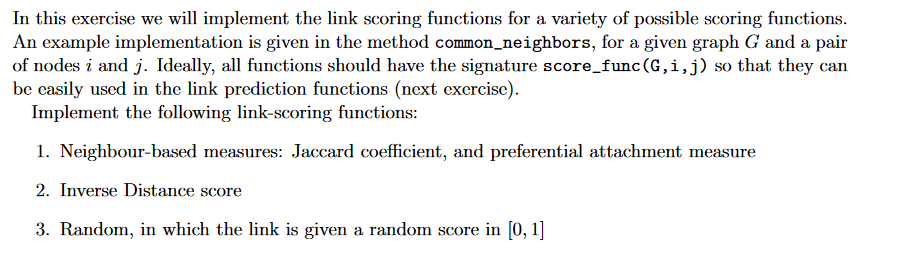

In [72]:
from IPython.display import Image

# Display the image
Image(filename='Link_Prediction/img.png')


In [78]:
import networkx as nx

def jaccard_coefficient(G, i, j):
    # Compute Jaccard Coefficient for nodes i and j
    return list(nx.jaccard_coefficient(G, [(i, j)]))[0][2]


In [79]:
def preferential_attachment(G, i, j):
    # Compute Preferential Attachment score for nodes i and j
    return list(nx.preferential_attachment(G, [(i, j)]))[0][2]


In [73]:
def evaluate_link_prediction(G, k, score_func):
    correct_predictions = 0
    total_predictions = 0

    for i in G.nodes():
        for j in G.nodes():
            if i != j and not G.has_edge(i, j):
                G.remove_edge(i, j)  # Temporarily remove the edge
                preds = link_list(G, k, i, score_func)
                G.add_edge(i, j)  # Restore the edge

                if (i, j) in [x[0:2] for x in preds]:
                    correct_predictions += 1
                total_predictions += 1

    return correct_predictions / total_predictions if total_predictions > 0 else 0


In [77]:
link_list(G,'31',common_neighbors)




TypeError: jaccard_coefficient() missing 1 required positional argument: 'G'